# Predicting Heart Disease

#### Table of Contents
* [Introduction](#1)
* [Import and Explore Dataset](#2)
* [Descriptive Statistics](#3)
* [Data Cleaning](#4)
* [Feature Selection](#5)
* [Build Training, Validation, and Test Datasets](#6)
* [Feature Normalization](#7)
* [Hyperparameter Optimization](#8)
* [Conclusion](#9)

#### Introduction <a class='anchor' id='1'></a>

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future.

The dataset has the following features:

>Age: age of the patient [years]

>Sex: sex of the patient [M: Male, F: Female]

>ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

>RestingBP: resting blood pressure [mm Hg]

>Cholesterol: serum cholesterol [mm/dl]

>FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

>RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or 

>depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

>MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

>ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

>Oldpeak: oldpeak = ST [Numeric value measured in depression]

>ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

>HeartDisease: output class [1: heart disease, 0: Normal]

#### Goal: Build a predictive model for heart disease.

#### Import and Explore Dataset <a class='anchor' id='2'></a>

In [96]:
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [97]:
cvd = pd.read_csv("D:/DataQuest/heart.csv") #read in CSV file

In [98]:
#explore cvd data set
cvd.info() # 918 rows by 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [99]:
cvd.isnull().sum() #screen for null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [100]:
cvd.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


#### Descriptive Statistics <a class='anchor' id='3'></a>

In [101]:
cvd.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Age: average age is 53, min-max is 28-77, data statistics do not seem out of place.

RestingBP: notably min is 0, resting blood pressure of 0 is abnormal.

Cholesterol: min value is 0, this is abnormal.

FastingBS: this is numeric categorical data

MaxHR: average 136, min-max: 60-202, seems acceptable

Oldpeak: unremarkable

HeartDisease: target variable, 0/1 numeric categorical data

#### Next we will visualize the categorical data.

In [102]:
cvd.dtypes[cvd.dtypes == object]


Sex               object
ChestPainType     object
RestingECG        object
ExerciseAngina    object
ST_Slope          object
dtype: object

In [103]:
cat_columns = list(cvd.columns[cvd.dtypes == object])
print(cat_columns)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [104]:
cat_columns.append('HeartDisease')
cat_columns.append('FastingBS')

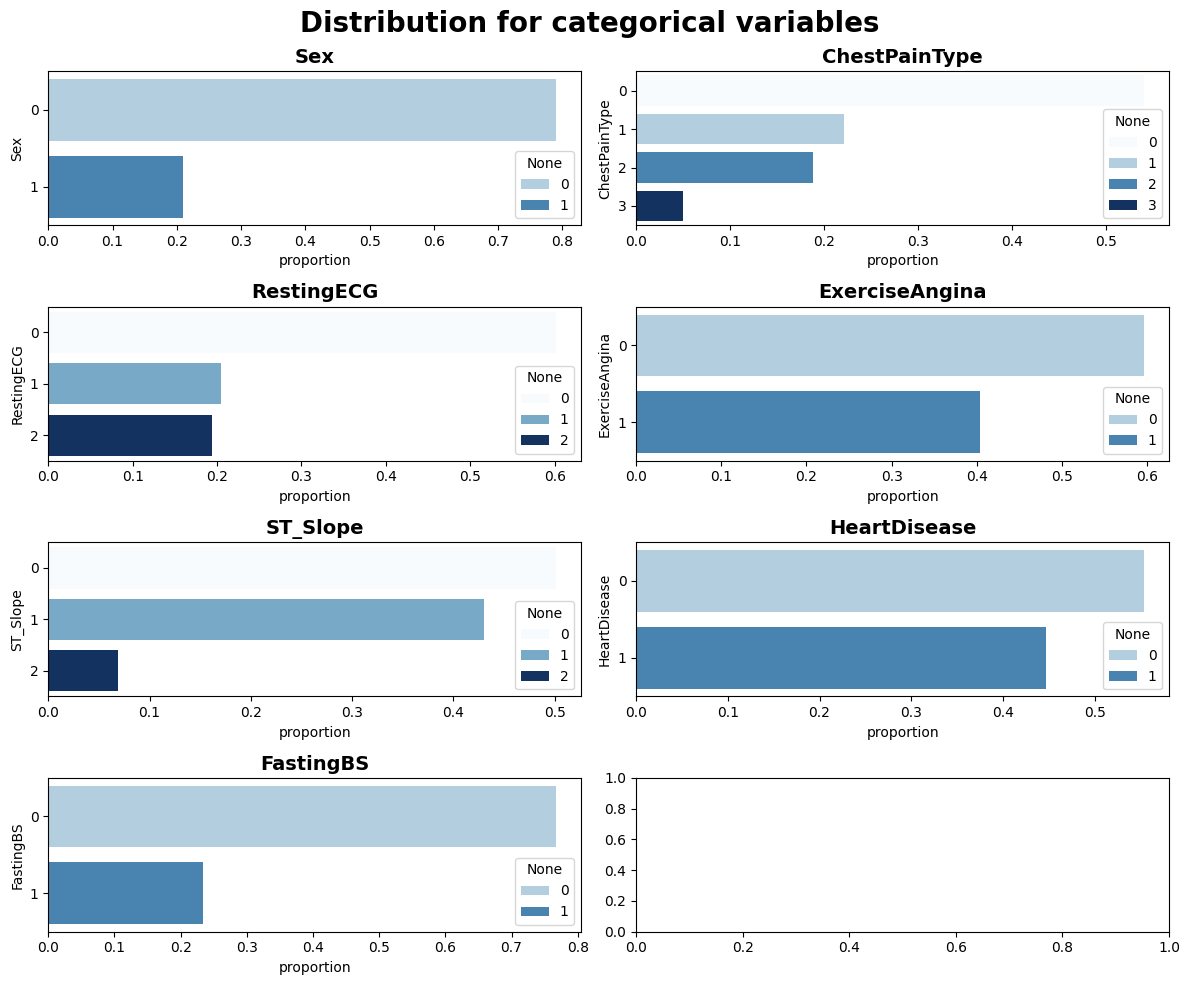

In [105]:
fig, ax = plt.subplots(4,2, figsize=(12,10))
ax = ax.flatten()

fig.suptitle('Distribution for categorical variables ',
            fontsize=20, fontweight='bold')

for i, x in enumerate(cat_columns):
    graph = cvd[x].value_counts(normalize=True).reset_index()
    sns.barplot(y=graph.index, x='proportion', data=graph, ax=ax[i], errorbar=None, orient='h', hue=graph.index, palette='Blues')
    ax[i].set_ylabel(x)
    ax[i].set_title(f"{x}", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


In [106]:
cat_columns.remove('HeartDisease')
print(cat_columns)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']


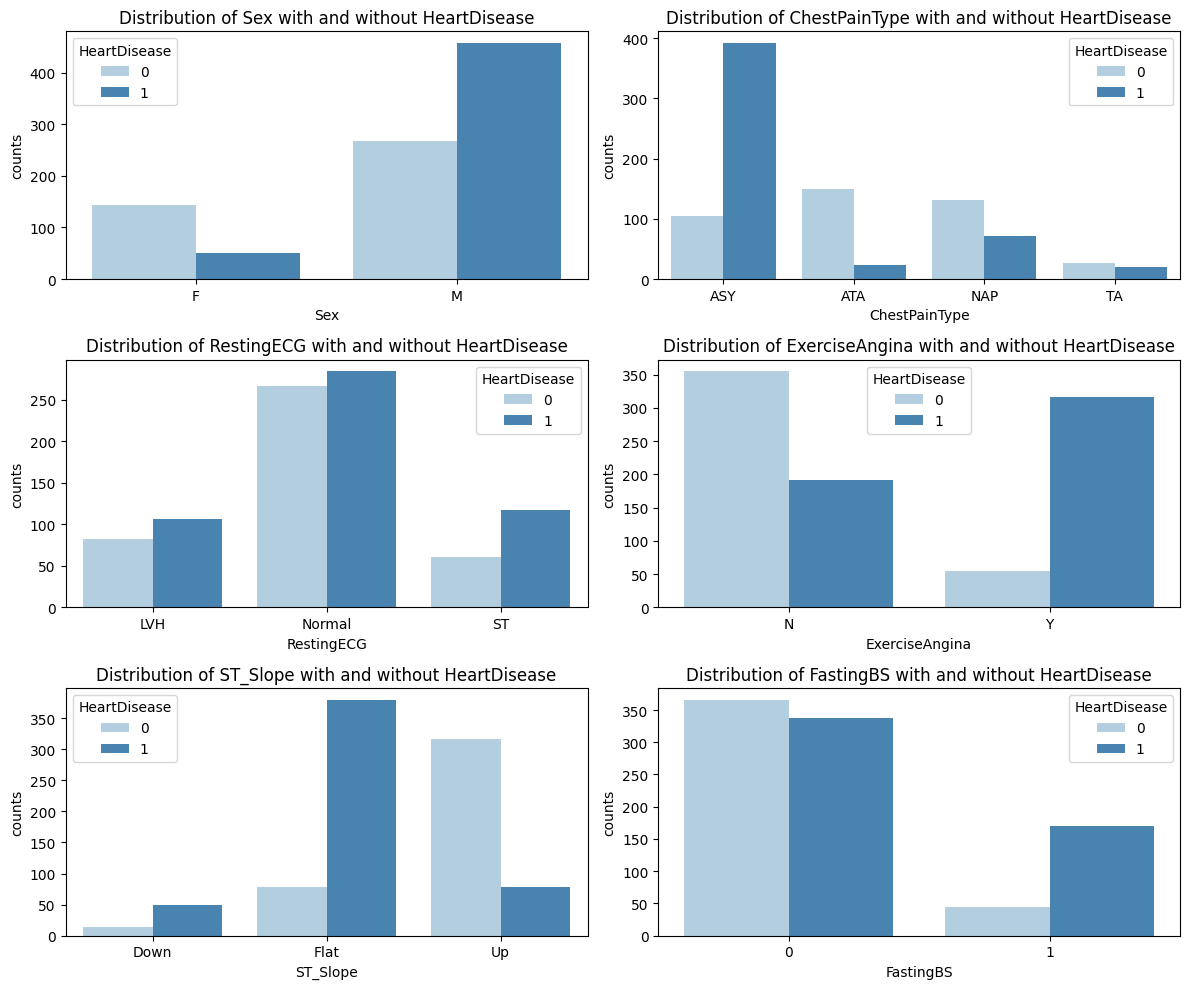

In [135]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
ax = ax.flatten()

for i,item in enumerate(cat_columns):
    cvd_hd = cvd.groupby(['HeartDisease', item]).size().reset_index(name='counts')
    cvd_hd = pd.DataFrame(cvd_hd)
    sns.barplot(data=cvd_hd,x=cvd_hd[item], y=cvd_hd['counts'],hue='HeartDisease',ax=ax[i], palette='Blues')
    ax[i].set_title(f'Distribution of {item} with and without HeartDisease')
plt.tight_layout()
plt.show()

We note from the descriptive statistics and visualization that there is a large representation of males compared to females in our dataset, which could potentially bias our model. However, it is a medical fact that men tend to be more prone to heart disease as estrogen is protective in the females.

we also note a higher proportion of people with heart disease having high blood sugar compared to low blood sugar.
We also note this same pattern with exerise angina and asymptomatic chest pain.

#### Data Cleaning <a class='anchor' id='4'></a>

Now we have a look at those columns where we noted having 0 values. Namely - RestingBP and Cholesterol.

In [109]:
cvd[cvd['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [110]:
cvd[cvd['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


It looks like there is only 1 row with RestingBP == 0. We will drop this row.
There are 172 rows with 0 Cholesterol. We will replace this with median value from the Cholesterol column.

In [111]:
#Drop RestingBP == 0  row
cvd = cvd.drop(449)
cvd[cvd['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [112]:
cvd_no_zero = cvd.drop(cvd[cvd['Cholesterol'] == 0].index)
cvd_no_zero['Sex'] = cvd_no_zero['Sex'].apply(lambda x: 1 if x == "M" else 0)
cvd_no_zero['ExerciseAngina'] = cvd_no_zero['ExerciseAngina'].apply(lambda x: 1 if x == "Y" else 0)
abs(cvd_no_zero[['Cholesterol','Age','HeartDisease','FastingBS','RestingBP','MaxHR','Sex','ExerciseAngina']].corr()['Cholesterol']).sort_values(ascending=False)

Cholesterol       1.000000
Sex               0.107045
HeartDisease      0.103866
RestingBP         0.095939
ExerciseAngina    0.086768
Age               0.058758
FastingBS         0.054012
MaxHR             0.019856
Name: Cholesterol, dtype: float64

No linear correlation detected between cholesterol and some of the selected features. But cholesterol is often related to age, sex, BP, and blood sugar. So we will take the median value after matching for (Sex, HeartDisease) and using that for the 0 values.

In [113]:
cvd_zero = cvd[cvd['Cholesterol'] == 0]
medians = cvd_no_zero[['Cholesterol','Sex','HeartDisease']].groupby(['Sex','HeartDisease']).median().reset_index()
medians

,Sex,HeartDisease,Cholesterol
0,0,0,238.5
1,0,1,275.0
2,1,0,227.0
3,1,1,243.0


In [114]:
cvd_zero

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [115]:
#Create function to substitute in the values after matching
def corr_chol(row):
    if row['Sex'] == 'F':
        if row['HeartDisease'] == 0:
            return medians['Cholesterol'][0]
        else:
            return medians['Cholesterol'][1]
    else:
        if row['HeartDisease'] == 0:
            return medians['Cholesterol'][2]
        else:
            return medians['Cholesterol'][3]

In [116]:
cvd_zero.loc[:,'Cholesterol'] = cvd_zero.apply(corr_chol, axis=1) #Apply function
print(cvd_zero['Cholesterol'].value_counts())

Cholesterol
243.0    141
227.0     19
275.0     10
238.5      1
Name: count, dtype: int64


In [117]:
#Convert all to 0/1 before concat
cvd_zero.loc[:,'Sex'] = cvd_zero['Sex'].apply(lambda x: 1 if x == "M" else 0)
cvd_zero.loc[:,'ExerciseAngina'] = cvd_zero['ExerciseAngina'].apply(lambda x: 1 if x == "Y" else 0)
#Recombined the datasets
cleaned_cvd = pd.concat([cvd_no_zero, cvd_zero], ignore_index=True)
cleaned_cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.1+ KB


#### Feature Selection <a class='anchor' id='5'></a>

The predictive features we will select will be: Age, Sex, ChestPainType, Cholesterol, and FastingBS

In [118]:
cleaned_cvd

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289.0,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180.0,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283.0,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214.0,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195.0,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,43,1,ASY,122,243.0,0,Normal,120,0,0.5,Up,1
913,63,1,NAP,130,227.0,1,ST,160,0,3.0,Flat,0
914,48,1,NAP,102,243.0,1,ST,110,1,1.0,Down,1
915,56,1,ASY,130,243.0,0,LVH,122,1,1.0,Flat,1


In [119]:
dummy_cvd = pd.get_dummies(cleaned_cvd[['ChestPainType','RestingECG','ST_Slope','Sex','ExerciseAngina']], prefix=['ChestPainType', 'RestingECG','ST_Slope','Sex','ExerciseAngina']).astype(int)
dummy_cvd

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_0,Sex_1,ExerciseAngina_0,ExerciseAngina_1
0,0,1,0,0,0,1,0,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
2,0,1,0,0,0,0,1,0,0,1,0,1,1,0
3,1,0,0,0,0,1,0,0,1,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,1,0,0,0,0,1,0,0,0,1,0,1,1,0
913,0,0,1,0,0,0,1,0,1,0,0,1,1,0
914,0,0,1,0,0,0,1,1,0,0,0,1,0,1
915,1,0,0,0,1,0,0,0,1,0,0,1,0,1


In [120]:
clean_w_dummy = pd.concat([cleaned_cvd, dummy_cvd], axis=1).reset_index()
clean_w_dummy.columns

Index(['index', 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up', 'Sex_0', 'Sex_1', 'ExerciseAngina_0',
       'ExerciseAngina_1'],
      dtype='object')

In [121]:
clean_w_dummy = clean_w_dummy.drop('ChestPainType', axis=1)
clean_w_dummy = clean_w_dummy.drop('RestingECG', axis=1)
clean_w_dummy = clean_w_dummy.drop('ST_Slope', axis=1)
clean_w_dummy = clean_w_dummy.drop('Sex', axis=1)
clean_w_dummy = clean_w_dummy.drop('ExerciseAngina', axis=1)
clean_w_dummy

,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_0,Sex_1,ExerciseAngina_0,ExerciseAngina_1
0,0,40,140,289.0,0,172,0.0,0,0,1,...,0,1,0,0,0,1,0,1,1,0
1,1,49,160,180.0,0,156,1.0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
2,2,37,130,283.0,0,98,0.0,0,0,1,...,0,0,1,0,0,1,0,1,1,0
3,3,48,138,214.0,0,108,1.5,1,1,0,...,0,1,0,0,1,0,1,0,0,1
4,4,54,150,195.0,0,122,0.0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,912,43,122,243.0,0,120,0.5,1,1,0,...,0,1,0,0,0,1,0,1,1,0
913,913,63,130,227.0,1,160,3.0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
914,914,48,102,243.0,1,110,1.0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
915,915,56,130,243.0,0,122,1.0,1,1,0,...,1,0,0,0,1,0,0,1,0,1


In [122]:
corr_matrix = clean_w_dummy.corr()
print(corr_matrix)


                      index       Age  RestingBP  Cholesterol  FastingBS  \
index              1.000000  0.293165  -0.026241    -0.011230   0.254357   
Age                0.293165  1.000000   0.263084     0.051002   0.198170   
RestingBP         -0.026241  0.263084   1.000000     0.085666   0.067823   
Cholesterol       -0.011230  0.051002   0.085666     1.000000   0.048916   
FastingBS          0.254357  0.198170   0.067823     0.048916   1.000000   
MaxHR             -0.074792 -0.382280  -0.109693    -0.013473  -0.131067   
Oldpeak            0.103779  0.258563   0.174252     0.053822   0.053062   
HeartDisease       0.267228  0.282012   0.117990     0.102912   0.267994   
ChestPainType_ASY  0.147976  0.166903   0.041568     0.087078   0.130629   
ChestPainType_ATA -0.261861 -0.218113  -0.051374    -0.015941  -0.140844   
ChestPainType_NAP  0.059541 -0.011681  -0.027536    -0.066638  -0.038201   
ChestPainType_TA   0.018476  0.032083   0.049464    -0.043701   0.026752   
RestingECG_L

<Axes: >

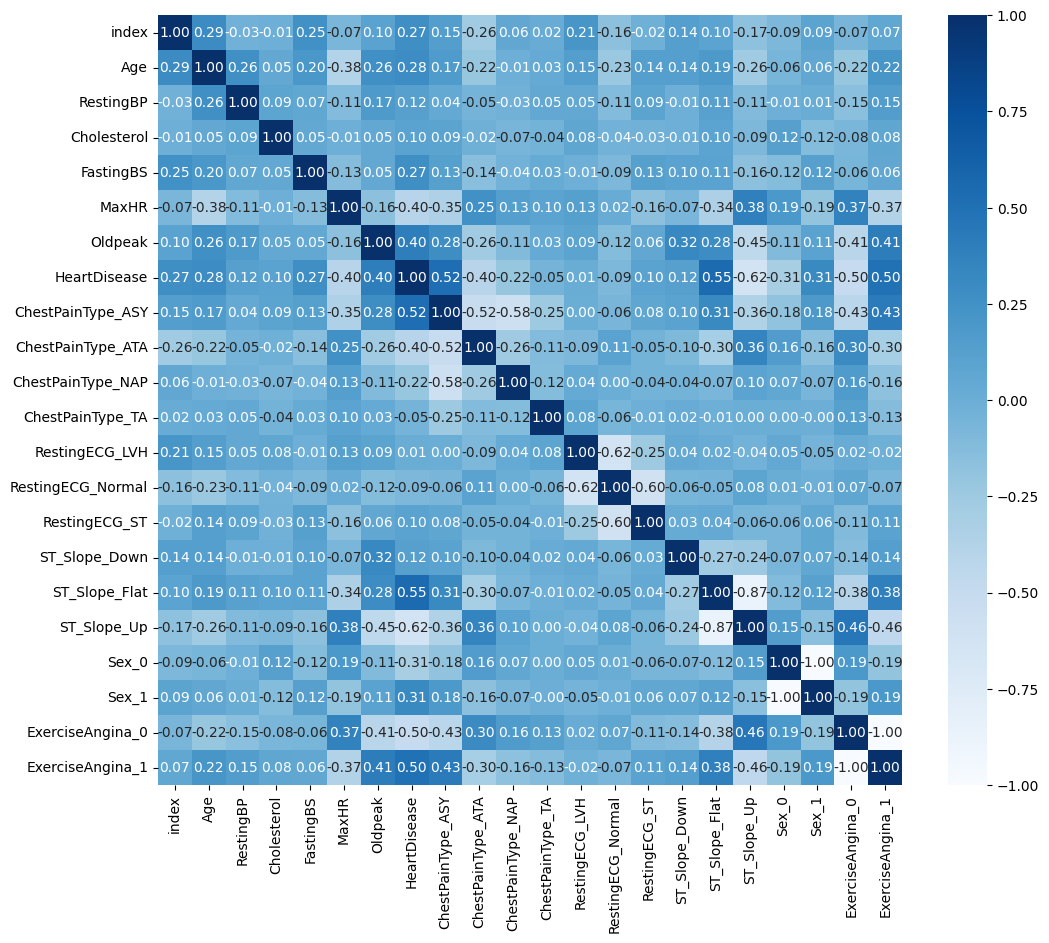

In [138]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')

We find that HeartDisease has some correlation with ST_Slope_Up, ST_Slope_Flat, ChestPainType_ATA, Oldpeak, ExerciseAngina, MaxHR, and Sex (correlation coefficient >0.3).

We will move forward to build and to train model based on these features.

#### Build Training, Validation, and Test Datasets <a class='anchor' id='6'></a>

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [125]:
#Split dataset into feature vs target
features = ['Oldpeak','MaxHR','ChestPainType_ATA','ST_Slope_Up','ST_Slope_Flat','ExerciseAngina_1','Sex_1']
X_data = clean_w_dummy[features]
y_data = clean_w_dummy['HeartDisease']

In [126]:
#Create training dataset
X_train, X_combined, y_train, y_combined = train_test_split(X_data, y_data, test_size=0.4,random_state=250)
#Create validation and test set
X_val, X_test, y_val ,y_test = train_test_split(X_combined, y_combined, test_size=0.5, random_state=250)
print(X_train.shape, X_val.shape, X_test.shape)

(550, 7) (183, 7) (184, 7)


In [127]:
#Test validation sets with single feature k-NN
features = ['Sex_1','Oldpeak','MaxHR','ChestPainType_ATA','ST_Slope_Up','ST_Slope_Flat','ExerciseAngina_1']
for x in features:
    X_train_x = X_train[[x]]
    X_val_x = X_val[[x]]
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_x,y_train)
    accuracy = knn.score(X_val_x,y_val)
    print(x, accuracy)

Sex_1 0.43169398907103823
Oldpeak 0.6666666666666666
MaxHR 0.6284153005464481
ChestPainType_ATA 0.43169398907103823
ST_Slope_Up 0.825136612021858
ST_Slope_Flat 0.7978142076502732
ExerciseAngina_1 0.43169398907103823


Next section we will include multiple features. But before that we will normalize the features so each contributes equally.

#### Feature Normalization <a class='anchor' id='7'></a>

Let's run with multiple features without normalization first.

In [128]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
accuracy = knn.score(X_val,y_val)
print(accuracy)

0.8087431693989071


Now we normalize.

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Rerun the model.

In [130]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
accuracy = knn.score(X_val_scaled,y_val)
print(accuracy)

0.8633879781420765


It looks like our accuracy has improved from 80.87% to 86.34%.

Before we dive further, let's optimize our hyperparameters

#### Hyperparameter Optimization <a class='anchor' id='8'></a>

In [131]:
from sklearn.model_selection import GridSearchCV

#Create dictionary for test parameters
grid_params = {"n_neighbors": range(1, 50),
                "metric": ["minkowski", "manhattan"],
                "weights": ['distance', 'uniform']
              }
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy') #Initiate grid
knn_grid.fit(X_train_scaled,y_train)

best_score = knn_grid.best_score_
best_params = knn_grid.best_params_

print(best_score, best_params)

0.8381818181818183 {'metric': 'minkowski', 'n_neighbors': 17, 'weights': 'uniform'}


It appears our accuracy actually decreased from optimization tuning.
This could be due to our small data set, pure randomness in model training, overfitting of training data.

In any case, let's try applying the best estimator to our validation set.

In [132]:
accuracy = knn_grid.best_estimator_.score(X_val_scaled,y_val) #Use gridsearchcv best_estimator
print(accuracy)

0.8907103825136612


It looks like it actually increased our accuracy when tested against our validation set.

GridSearchCV creates its own internal validation when testing so that could be the reason. Likely contributing to this randomness is how small our validation set is.

Let's apply to our test set.

In [133]:
X_test_scaled = scaler.transform(X_test)
accuracy = knn_grid.best_estimator_.score(X_test_scaled,y_test) #Use gridsearchcv best_estimator
print(accuracy)

0.8369565217391305


It looks like our model's accuracy is in the 80% range. 

#### Conclusion <a class='anchor' id='9'></a>

Overall our model's accuracy is about 83.69%. 

To improve the model's accuracy further we may need to train the model using different combinations of features. We may also want to consider eliminating certain features that could introduce bias. For example, our dataset had very limited numbers of female patients.